# Logistic Regression

In [2]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data

In [3]:
data = pd.read_csv("dataset7.csv")
data.head()

,hr,bp,pkhr,sbp,mphr,age,baseef,gender
0,92,103,114,86,74,85,27,0
1,62,139,120,158,82,73,39,0
2,62,139,120,157,82,73,39,0
3,93,118,118,105,72,57,42,1
4,89,103,129,173,69,34,45,0


## Model Development and Prediction

In [4]:
X = data.drop("gender", axis=1)
Y = data["gender"]

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [7]:
model = LogisticRegression()
model.fit(X_train, Y_train)

predictions = model.predict(X_test)

## Confusion Matrix

In [14]:
confusion_matrix = metrics.confusion_matrix(Y_test, predictions)

Text(0.5,257.44,'Predicted label')

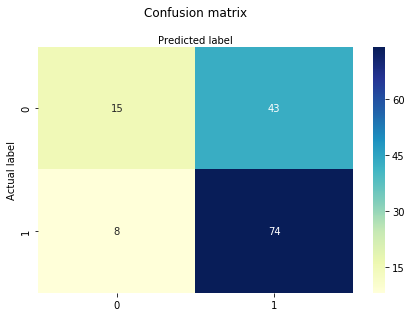

In [16]:
class_names=[0, 1] # Name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# Create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [11]:
print "Accuracy =", round(metrics.accuracy_score(Y_test, predictions), 2)
print "Precision =", round(metrics.precision_score(Y_test, predictions), 2)
print "Recall =", round(metrics.recall_score(Y_test, predictions), 2)

Accuracy = 0.64
Precision = 0.63
Recall = 0.9


From the values above, we can say that our model an accuracy of 64%. It makes precise predicitions of a persons gender 63% of the time and is able to recall one's gender 90% of the time.

## ROC Curve

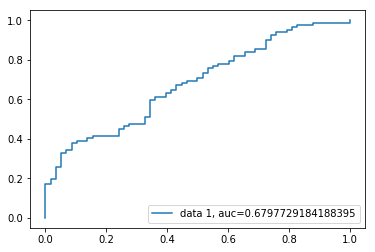

In [12]:
predictions_probability = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  predictions_probability)
auc = metrics.roc_auc_score(Y_test, predictions_probability)
plt.plot(fpr, tpr, label="data 1, auc=" + str(auc))
plt.legend(loc=4)
plt.show()

The AUC score of 0.67 means that our classifier is still good and not completely worthless.